# 1. Niño 3.4 index

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
ds=xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
#修改经度 https://blog.csdn.net/weixin_44237337/article/details/119707332
lon_name = 'lon'  
ds['longitude_adjusted'] = xr.where(
    ds[lon_name] > 180,
    ds[lon_name] - 360,
    ds[lon_name])
ds = (
    ds
    .swap_dims({lon_name: 'longitude_adjusted'})
    .sel(**{'longitude_adjusted': sorted(ds.longitude_adjusted)})
    .drop(lon_name))
ds = ds.rename({'longitude_adjusted': lon_name})
ds

<xarray.Dataset>
Dimensions:  (lat: 89, time: 684, lon: 180)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
  * lon      (lon) float32 -178.0 -176.0 -174.0 -172.0 ... 176.0 178.0 180.0
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

### 1.1 [5 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [4]:
# Group data by month
group_data = ds.sst.sel(time=slice('2000','2020'),lat=slice(-5, 5), lon=slice(-170, -120)).groupby('time.month')#每个月group
group_data

# Apply mean to grouped data, and then compute the anomaly 
sst_anom = group_data - group_data.mean(dim='time')#减去平均值得到每个月的异常值
sst_anom

<xarray.DataArray 'sst' (time: 204, lat: 5, lon: 26)>
array([[[-1.118824  , -1.1214886 , -1.150589  , ..., -1.3624973 ,
         -1.3744087 , -1.3799725 ],
        [-1.4290504 , -1.4609966 , -1.4892483 , ..., -1.8774624 ,
         -1.8812847 , -1.8662701 ],
        [-1.5547962 , -1.5785427 , -1.6081295 , ..., -2.1097736 ,
         -2.0868912 , -2.0512981 ],
        [-1.4061565 , -1.4381485 , -1.4645119 , ..., -1.871973  ,
         -1.8234806 , -1.7845364 ],
        [-1.112154  , -1.1489315 , -1.1748753 , ..., -1.4238663 ,
         -1.3608665 , -1.318779  ]],

       [[-1.3563919 , -1.3414516 , -1.3447266 , ..., -0.8294525 ,
         -0.7846012 , -0.73467445],
        [-1.6471577 , -1.6449184 , -1.6359806 , ..., -1.1496124 ,
         -1.0849762 , -1.0033855 ],
        [-1.744566  , -1.7402573 , -1.7403984 , ..., -1.2694149 ,
         -1.1815548 , -1.0942421 ],
        [-1.5866966 , -1.6118927 , -1.628561  , ..., -1.0600357 ,
         -0.9620571 , -0.8987026 ],
        [-1.2834396 , -1.3297119 , -1.3557701 , ..., -0.77931595,
...
         -0.40706253, -0.30384254],
        [-1.2256775 , -1.2794132 , -1.310749  , ..., -1.0533504 ,
         -0.98057556, -0.88526726],
        [-1.4473782 , -1.5087299 , -1.5488529 , ..., -1.2411575 ,
         -1.1787853 , -1.1105576 ],
        [-1.2360783 , -1.3083897 , -1.3587303 , ..., -0.84552574,
         -0.8005676 , -0.75094414],
        [-0.7388668 , -0.81677055, -0.88033867, ..., -0.45897293,
         -0.40322113, -0.34649658]],

       [[-0.5671711 , -0.6048603 , -0.63334084, ..., -0.37074852,
         -0.299366  , -0.20986938],
        [-0.968071  , -1.0111103 , -1.0482082 , ..., -0.88599396,
         -0.80389786, -0.6944294 ],
        [-1.157917  , -1.2153683 , -1.2613754 , ..., -1.0810757 ,
         -0.9875736 , -0.86647797],
        [-0.98932457, -1.063715  , -1.1221886 , ..., -0.7572441 ,
         -0.6885624 , -0.58524704],
        [-0.5999756 , -0.6771698 , -0.74407005, ..., -0.38700104,
         -0.34832382, -0.26984596]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2016-12-15
  * lon      (lon) float32 -170.0 -168.0 -166.0 -164.0 ... -124.0 -122.0 -120.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

### 1.2 [5 points] Visualize the computed Niño 3.4. Your plot should look similar to this one

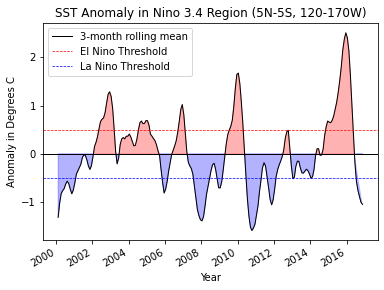

In [5]:
sst_anom_rolling = sst_anom.rolling(time=3, center=True).mean()#??what is the difference between rolling mean and running mean
# Plot 12-month rolling mean
sst_anom_rolling_line=sst_anom_rolling.mean(dim=['lat', 'lon'])#
sst_anom_rolling_line.plot(color='k',linewidth=1,label="3-month rolling mean")

plt.axhline(y=0.5, color='red', linestyle='--',linewidth=0.7,label='EI Nino Threshold')
plt.axhline(y=0, color='k', linestyle='-',linewidth=1)
plt.axhline(y=-0.5, color='blue', linestyle='--',linewidth=0.7,label='La Nino Threshold')

# https://www.jianshu.com/p/e972a7bc3c83
plt.fill_between(sst_anom_rolling['time'], sst_anom_rolling_line, 0,
                 where=(sst_anom_rolling_line >0 ),
                 interpolate=True,color='red', alpha=0.3, )
plt.fill_between(sst_anom_rolling['time'], sst_anom_rolling_line, 0,
                 where=(sst_anom_rolling_line <=0 ),
                 interpolate=True, color='blue', alpha=0.3, )

# plt.gca().set(ylim=(-3,3), xlim=(2000, 2020)# Set xy limit
plt.legend()
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degrees C')
plt.show()

# 2. Earth’s energy budget

In [6]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
ds=xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 2.1 [5 points] Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is 

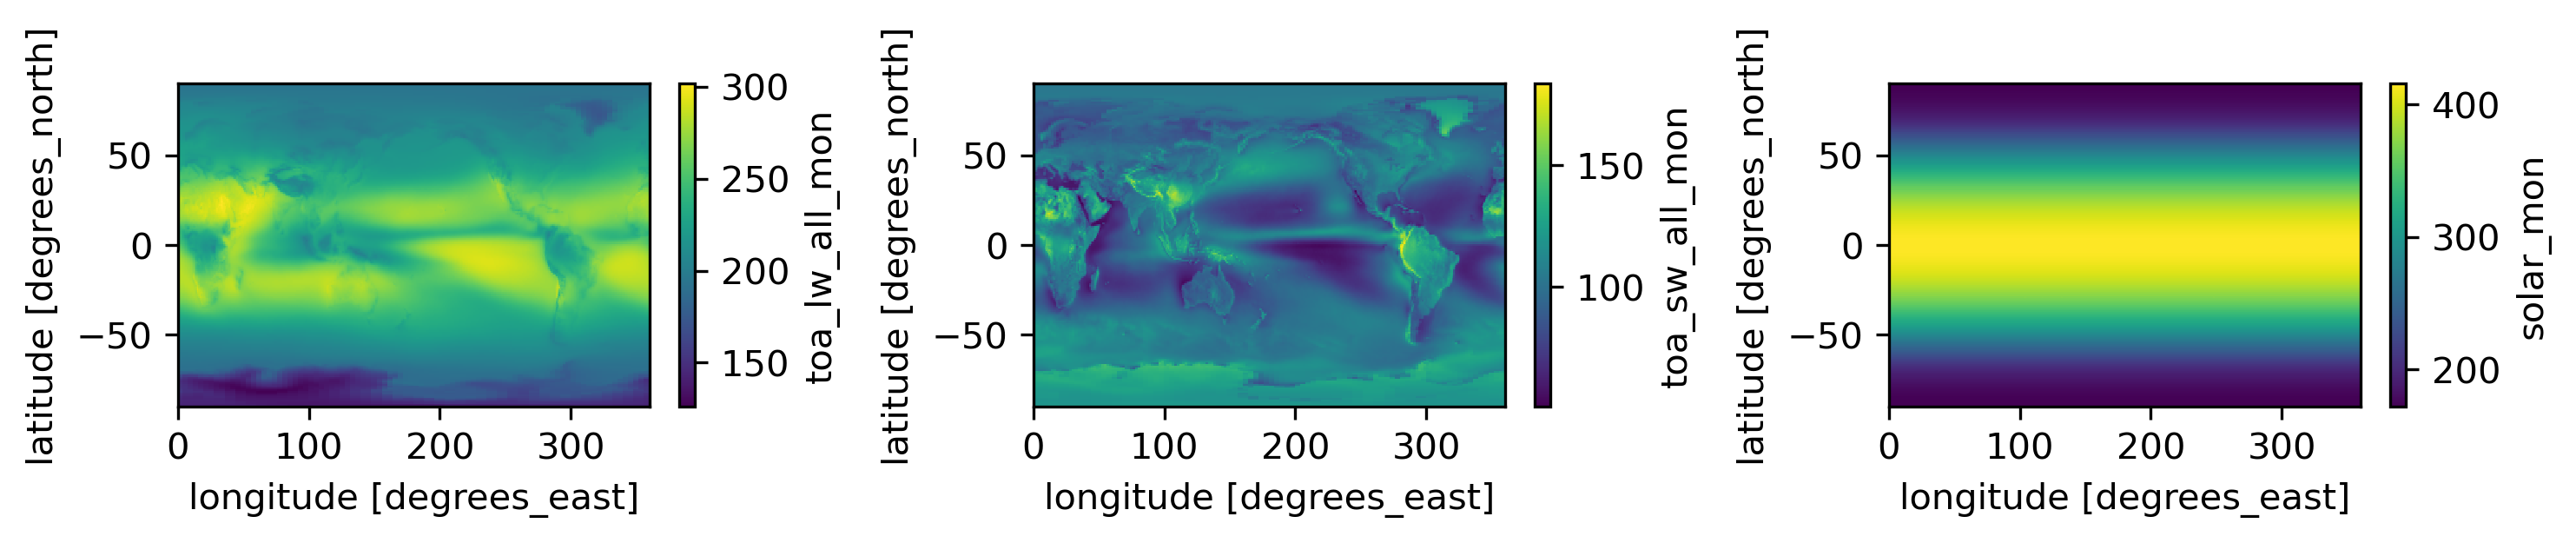

In [8]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,2), sharey=False, dpi=300)#b不共用y
ds.toa_lw_all_mon.mean(dim=['time']).plot(ax=ax1)
ds.toa_sw_all_mon.mean(dim=['time']).plot(ax=ax2)
ds.solar_mon.mean(dim=['time']).plot(ax=ax3)

plt.tight_layout()#更紧凑一点
plt.show()

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is 

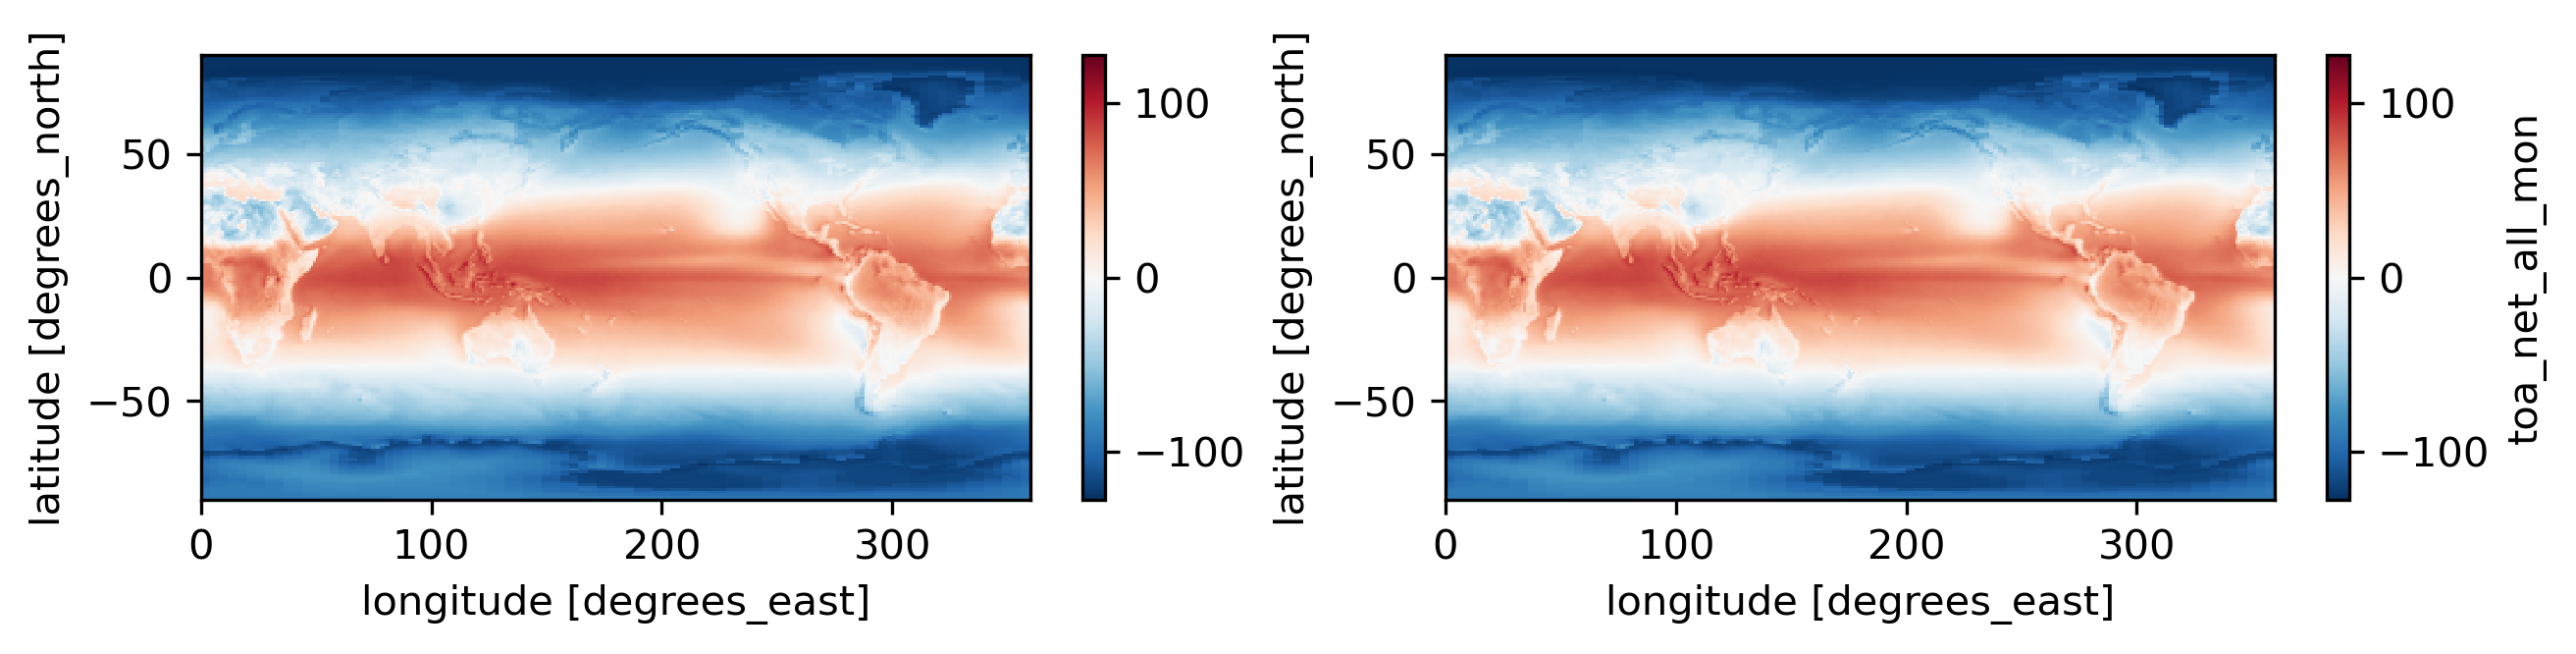

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,2), sharey=False, dpi=300)#b不共用y
(-ds.toa_lw_all_mon.mean(dim=['time'])-ds.toa_sw_all_mon.mean(dim=['time'])+ds.solar_mon.mean(dim=['time'])).plot(ax=ax1)
ds.toa_net_all_mon.mean(dim=['time']).plot(ax=ax2)

### 2.2 [10 points] Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.

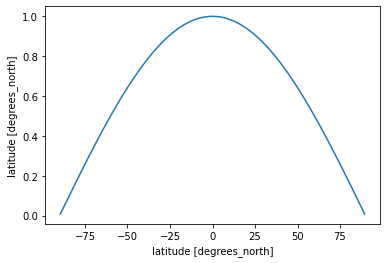

In [10]:
import math
weights=np.cos(np.deg2rad(ds.lat))
weights.dims
weights.plot()


In [11]:
print('TOA incoming solar:')
ds.solar_mon.weighted(weights).mean()

TOA incoming solar:


<xarray.DataArray 'solar_mon' ()>
array(340.28326598)

In [12]:
print('outgoing longwave:')
ds.toa_lw_all_mon.weighted(weights).mean()

outgoing longwave:


<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.26693375)

In [13]:
print('outgoing shortwave:')
ds.toa_sw_all_mon.weighted(weights).mean()

outgoing shortwave:


<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.13805277)

### 2.3 [5 points] Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


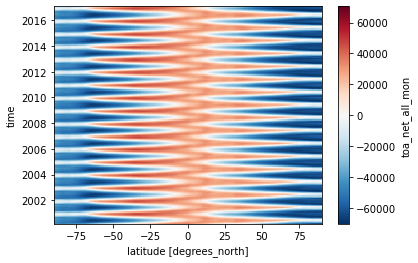

In [14]:
ds.toa_net_all_mon.sum(dim=['lon']).plot()

###  2.4 [5 points] Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is 

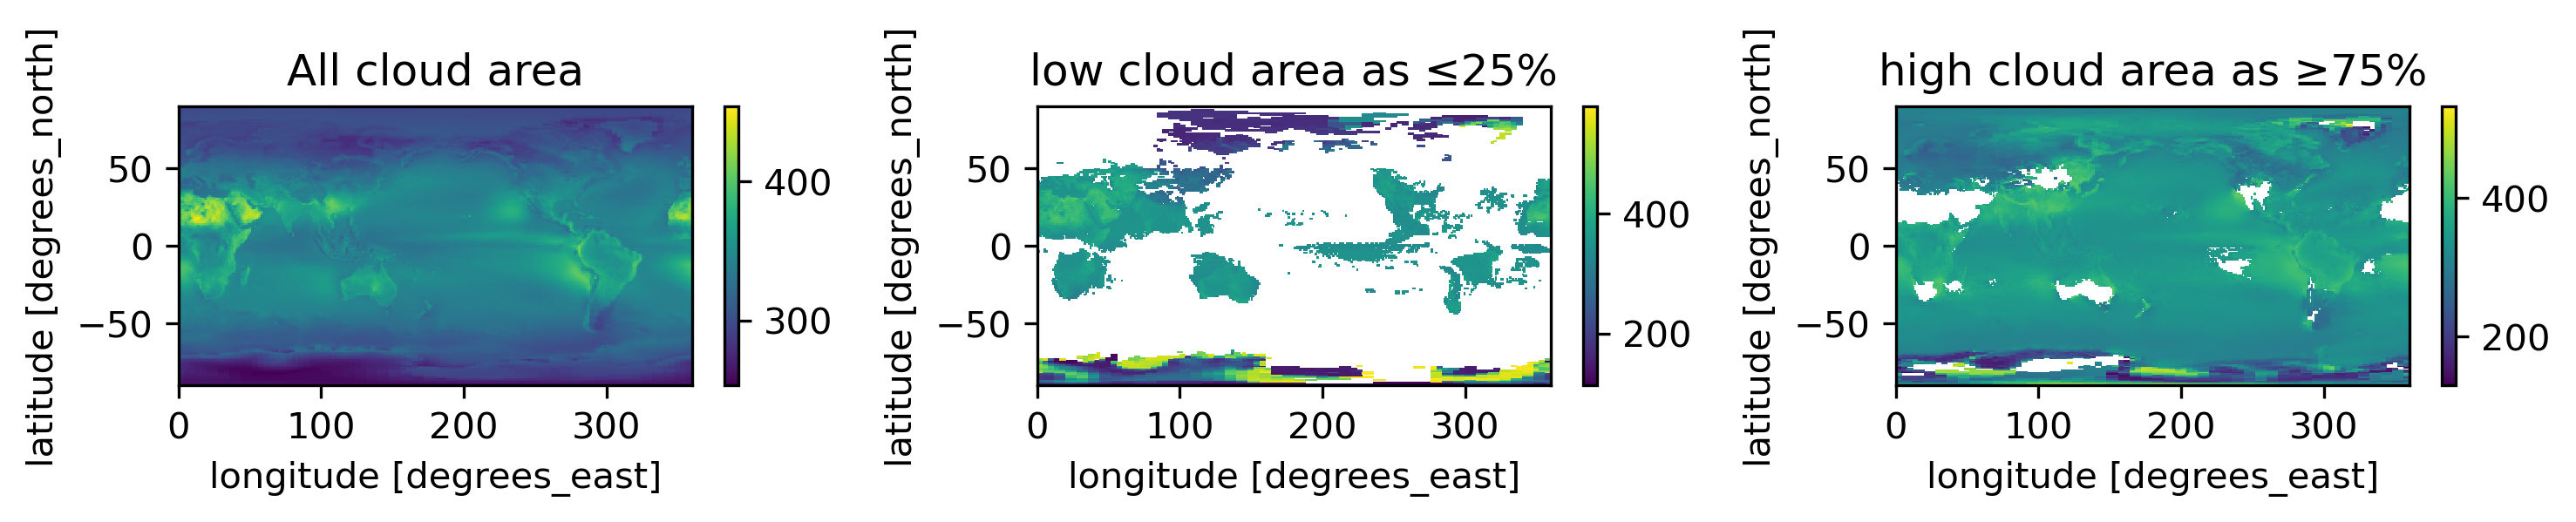

In [15]:
# ds.cldarea_total_daynight_mon.sel()
fig, (ax1, ax2,ax3,) = plt.subplots(1,3, figsize=(10,2), sharey=False, dpi=300)#b不共用y
toa_lw_all_mon_all=ds.toa_lw_all_mon.mean(dim=['time'])
toa_sw_all_mon_all=ds.toa_sw_all_mon.mean(dim=['time'])
composites= toa_lw_all_mon_all+toa_sw_all_mon_all
composites.plot(ax=ax1)
ax1.set_title('All cloud area')

toa_lw_all_mon_lt25=ds.where(ds.cldarea_total_daynight_mon<25).toa_lw_all_mon.mean(dim=['time'])
toa_sw_all_mon_lt25=ds.where(ds.cldarea_total_daynight_mon<25).toa_sw_all_mon.mean(dim=['time'])
composites_lt25= toa_lw_all_mon_lt25+toa_sw_all_mon_lt25
composites_lt25.plot(ax=ax2)
ax2.set_title('low cloud area as ≤25%')

toa_lw_all_mon_gt75=ds.where(ds.cldarea_total_daynight_mon>75).toa_lw_all_mon.mean(dim=['time'])
toa_sw_all_mon_gt75=ds.where(ds.cldarea_total_daynight_mon>75).toa_sw_all_mon.mean(dim=['time'])
composites_gt75= toa_lw_all_mon_gt75+toa_sw_all_mon_gt75
composites_gt75.plot(ax=ax3)
ax3.set_title('high cloud area as ≥75%')
plt.tight_layout()#更紧凑一点

### 2.5 [5 points] Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

In [16]:
# Don't have a clear understanding of the question

In [17]:
toa_lw_all_mon_lt25=ds.where(ds.cldarea_total_daynight_mon<25).toa_lw_all_mon.mean()
print(toa_lw_all_mon_lt25)
toa_sw_all_mon_lt25=ds.where(ds.cldarea_total_daynight_mon<25).toa_sw_all_mon.mean()
print(toa_sw_all_mon_lt25)

toa_lw_all_mon_gt75=ds.where(ds.cldarea_total_daynight_mon>75).toa_lw_all_mon.mean()
print(toa_lw_all_mon_gt75)
toa_sw_all_mon_gt75=ds.where(ds.cldarea_total_daynight_mon>75).toa_sw_all_mon.mean()
print(toa_sw_all_mon_gt75)

<xarray.DataArray 'toa_lw_all_mon' ()>
array(247.33109, dtype=float32)
<xarray.DataArray 'toa_sw_all_mon' ()>
array(97.11116, dtype=float32)
<xarray.DataArray 'toa_lw_all_mon' ()>
array(215.39049, dtype=float32)
<xarray.DataArray 'toa_sw_all_mon' ()>
array(111.765945, dtype=float32)


# 3. Explore a netCDF dataset

In [19]:
import netCDF4
import numpy
import xarray as xr
import glob
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
# ds = xarray.open_mfdataset('data/MERRA2_300.tavgU_2d_glc_Nx.200101.nc4', engine="netcdf4")
# ds.SNOWDP_GL.isel(time=0).sel(lon=slice(0, 360), lat=slice(-90, 90)).plot()

#### 下面这段是将多个nc文件合成一个,数据较大,因此不上传原始多个nc文件,直接读取合成后的文件 MERRA2_combined.nc

In [21]:
#data from:  https://disc.gsfc.nasa.gov/datasets/M2TUNXGLC_5.12.4/summary?keywords=snow #this data is about snow 
#combine the .nc4 file and warite it, taking long time!!!!!!!!!!!!!.
# ds = xr.open_mfdataset('data/MERRA2*.nc4',combine = 'by_coords', concat_dim="time")#https://neetinayak.medium.com/combine-many-netcdf-files-into-a-single-file-with-python-469ba476fc14
# ds.to_netcdf('MERRA2_combined.nc')

In [23]:
ds=xr.open_dataset("MERRA2_combined.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:    (time: 1816, lat: 361, lon: 576)
Coordinates:
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time       (time) datetime64[ns] 2001-01-01T01:30:00 ... 2020-12-01T22:30:00
Data variables:
    WESNSC     (time, lat, lon) float32 ...
    RUNOFF     (time, lat, lon) float32 ...
    SNOMAS_GL  (time, lat, lon) float32 ...
    WESNEXT    (time, lat, lon) float32 ...
    SNOWDP_GL  (time, lat, lon) float32 ...
    ASNOW_GL   (time, lat, lon) float32 ...
    SNICEALB   (time, lat, lon) float32 ...
Attributes: (12/32)
    History:                           Original file generated: Wed Jun 24 06...
    Filename:                          MERRA2_300.tavgU_2d_glc_Nx.200101.nc4
    Comment:                           GMAO filename: d5124_m2_jan00.tavg3_2d...
    Conventions:                       CF-1
    Institution:                       NASA Global Modeling and Assimilation ...
    References:                        http://gmao.gsfc.nasa.gov
    ...                                ...
    Contact:                           http://gmao.gsfc.nasa.gov
    identifier_product_doi:            10.5067/7VUPQC736SWX
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    DODS_EXTRA.Unlimited_Dimension:    time
    history:                           2021-11-13 13:11:28 GMT Hyrax-1.16.3 h...

In [ ]:
# Group data by month
group_data = ds.SNOWDP_GL.groupby('time.month')#每个月group

# Apply mean to grouped data, and then compute the anomaly 
SNOWDP_GL_anom = group_data - group_data.mean(dim='time')#减去平均值得到每个月的异常值
SNOWDP_GL_anom

# # Plot global mean anomalies
SNOWDP_GL_anom.mean(dim=['lat', 'lon']).plot()

E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
No handles with labels found to put in legend.
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
E:\LQQ\zhuangyeruanjian\Anaconda\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value e

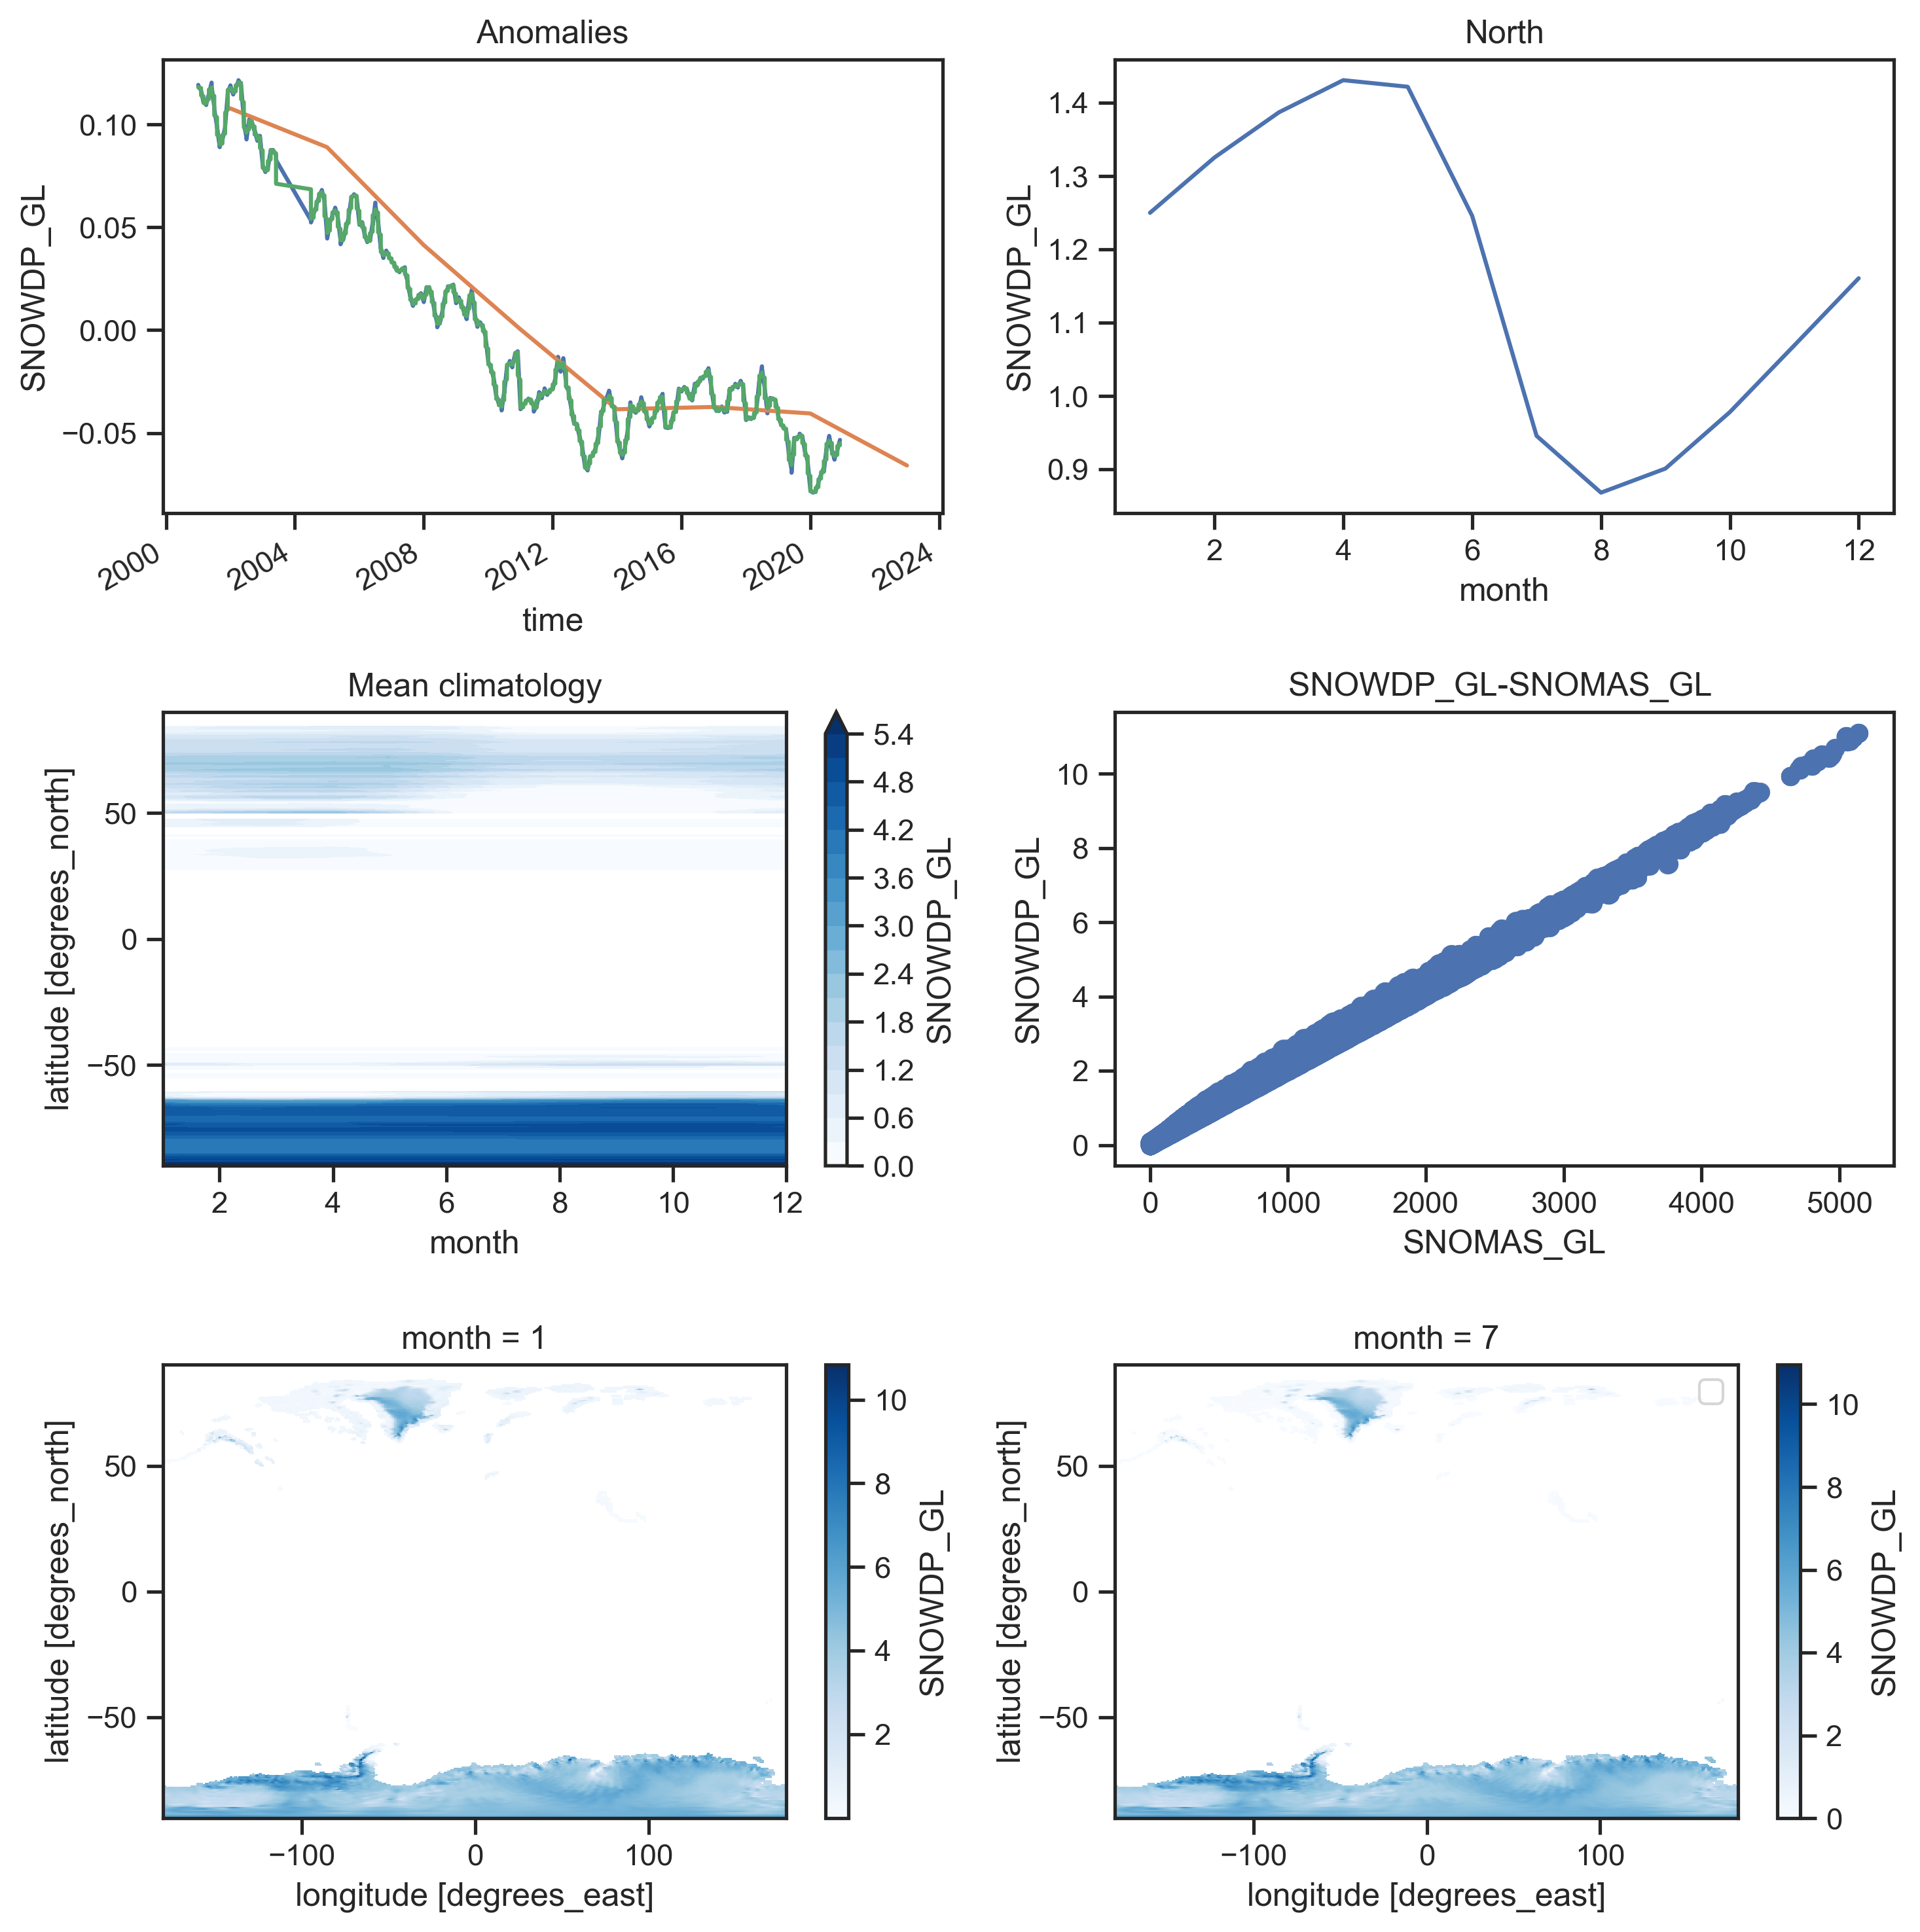

In [35]:
fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2 ,figsize=(10,10), sharey=False, dpi=300)#b不共用y
#########################ax1:全球雪深时间序列########################################
# Group data by month # Apply mean to grouped data, and then compute the anomalies 
group_data = ds.SNOWDP_GL.groupby('time.month')
SNOWDP_GL_anom = group_data - group_data.mean(dim='time')
resample_obj = SNOWDP_GL_anom.resample(time="3Y").mean(dim="time")
ds_anom_rolling = SNOWDP_GL_anom.rolling(time=12, center=True).mean()

# Plot anomalies
SNOWDP_GL_anom.mean(dim=['lat', 'lon']).plot(label="monthly anomalies",ax=ax1)
# Plot 3-year averaged anomalies
resample_obj.mean(dim=['lat', 'lon']).plot(label="3-year resample",ax=ax1)
# Plot 12-month rolling mean
ds_anom_rolling.mean(dim=['lat', 'lon']).plot(label="12-month rolling mean",ax=ax1)

# Add the legend
plt.legend()
ax1.set_title('Anomalies')

####################################北半球各月份 历年平均雪深
SNOWDP_GL_clim = ds.sel(lat=slice(0, 90), lon=slice(-180,180)).SNOWDP_GL.groupby('time.month').mean()#选取北半球
SNOWDP_GL_clim.mean(dim=['lat', 'lon']).plot(ax=ax2)
ax2.set_title('North')

# ############################Plot a contour map of the SNOWDP_GL mean climatology. Show a 2-D figure.
SNOWDP_GL_month=ds.SNOWDP_GL.groupby('time.month').mean()
SNOWDP_GL_month.mean(dim='lon').transpose().plot.contourf(levels=20, robust=True, cmap='Blues',ax=ax3)
ax3.set_title('Mean climatology')
# ############################################## Scatter plot
ax4.scatter(ds.sel(time='2020').SNOMAS_GL, ds.sel(time='2020').SNOWDP_GL,color='b',alpha=0.5 )
ax4.set_title('SNOWDP_GL-SNOMAS_GL ')
ax4.set_xlabel('SNOMAS_GL');ax4.set_ylabel('SNOWDP_GL')  
# ##############################1月历年均值
ds.SNOWDP_GL.groupby('time.month').mean().sel(month=1).plot(cmap='Blues',ax=ax5)
################################7月历年平均
ds.SNOWDP_GL.groupby('time.month').mean().sel(month=7).plot(cmap='Blues',ax=ax6)
plt.tight_layout()
plt.show()